<a href="https://colab.research.google.com/github/kangkwanghyup/2022test/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC(opencv)_11/1%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PIL(pillow), matplotlib, opencv

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO

from google.colab.patches import cv2_imshow

In [ ]:
url = 'https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_960_720.jpg'
response=requests.get(url)
pic =Image.open(BytesIO(response.content)) #바이트 정보 형태로 url 을 오픈
pic

넘파이 배열로 이미지 데이터 활용하기

In [ ]:
pic_arr=np.asarray(pic)

pic_arr.shape

In [ ]:
pic_arr

In [ ]:
plt.imshow(pic_arr)
plt.show()

In [ ]:
pic_copy=pic_arr.copy()
pic_copy=pic_copy[200:400,100:300,:]
pic_copy.shape
plt.imshow(pic_copy)
plt.show()

필터 칼라 RED 만 보기
채널 순서 R:0  G:1  B:2   

In [ ]:
pic_copy=pic_arr.copy()
print(pic_copy[:,:,0])  #3개의 배열중에 red 채널만 보여줘
print(pic_copy[:,:,0].shape)

In [ ]:
plt.imshow(pic_copy[:,:,0])
plt.show()                  #RED 체널만 볼수 있게

In [ ]:
plt.imshow(pic_copy[:,:,0], cmap='gray')
plt.show()

In [10]:
#R채널에 대한 분포 확인
pic_red=pic_arr.copy()
pic_red[:,:,1]=0        #RGB중에서 0체널 뺴고 나머지 green, blue 값을 0으로 만들어줌
pic_red[:,:,2]=0

In [ ]:
pic_red

In [ ]:
plt.imshow(pic_red)
plt.show()

<< 실습 >>

blue 바꿔보기 ,
green으로 바꿔보기

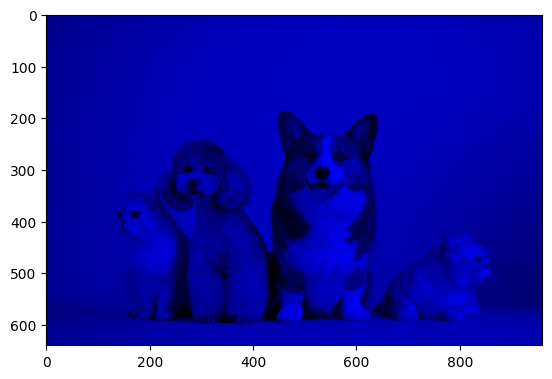

OPEN CV를 활용한 이미지 출력

In [14]:
from google.colab.patches import cv2_imshow  #코랩에서 오픈CV사용을 위해 필요

In [ ]:
cv2_imshow(pic_arr)   #open cv 는 BGR이여서 변화가 필요하다.

In [ ]:
pic_arr

In [ ]:
image=cv2.cvtColor(pic_arr, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

In [ ]:
image

In [ ]:
temp_arr=pic_arr[:,:,::-1]
cv2_imshow(temp_arr)

shell wget으로 이미지 가져오기

In [ ]:
!wget -O lion.jpg https://files.worldwildlife.org/wwfcmsprod/images/Lion_WWFGIFTS_cover_2020/magazine_small/2wafu1bmcz_b21fc8e6.jpeg

In [21]:
image=cv2.imread('/content/lion.jpg', cv2.IMREAD_UNCHANGED)

In [ ]:
print(type(image))

In [ ]:
image.shape

In [ ]:
print(image)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
lion=image.copy()
lion_cvt=lion[:,:,::-1]
plt.imshow(lion_cvt)
plt.show()

In [ ]:
img_gray=cv2.imread('/content/lion.jpg', cv2.IMREAD_GRAYSCALE)
print(img_gray.shape)
cv2_imshow(img_gray)

이미지 데이터 기하학적 변환

In [ ]:
#Resize

!wget -O Moon.jpg https://cdn.pixabay.com/photo/2021/06/26/06/52/moon-6365467_960_720.jpg
img=cv2.imread('/content/Moon.jpg')
print(img.shape)

In [ ]:
cv2_imshow(img)

In [31]:
height, width=img.shape[:2]
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation= cv2.INTER_AREA)
zoom=cv2.resize(img, (width*2, height*2), interpolation=cv2.INTER_CUBIC)
zoom2=cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

In [ ]:
cv2_imshow(shrink)
print(shrink.shape)

In [ ]:
cv2_imshow(zoom)
print(zoom.shape)

In [34]:
#Translation
rows, cols = img.shape[:2]

M=np.float32([[1,0,20],[0,1,40]])
dst= cv2.warpAffine(img, M, (cols, rows))

In [ ]:
cv2_imshow(dst)

In [36]:
#Rotate
rows, cols =img.shape[:2]
M=cv2.getRotationMatrix2D((cols/2, rows/2), 60, 0.5 )
dst =cv2.warpAffine(img, M, (cols, rows))

In [ ]:
cv2_imshow(dst)
print(dst.shape)

In [ ]:
#Flip
img=cv2.imread('/content/Moon.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result1=cv2.flip(img,1)    #좌우 반전
plt.imshow(result1)
plt.show()

In [ ]:
result2=cv2.flip(img, 0) #상하반전
plt.imshow(result2)
plt.show()

Affine 변환

In [41]:
rows, cols, ch= img.shape

pts1= np.float32([[200,100], [400,100], [200,200]])
pts2=np.float32([[200,300], [400,100], [200,400]])

cv2.circle(img, (200,100),10, (255,0,0), -1 )  #빨간원
cv2.circle(img, (400,100),10, (0,255,0), -1 )  #파란원
cv2.circle(img, (200,200),10, (0,0,255), -1 )  #녹색원

M=cv2.getAffineTransform(pts1, pts2)

dst=cv2.warpAffine(img, M, (cols, rows))

In [ ]:
cv2_imshow(dst)
print(dst.shape)

In [ ]:
plt.subplot(121)
plt.imshow(img[:, :, ::-1])

plt.title('Image')

plt.subplot(122)
plt.imshow(dst[:, :, ::-1])
plt.title('get Affine')

In [ ]:
M = np.array([ [np.cos(np.pi/6), -np.sin(np.pi/6), 100],
               [np.sin(np.pi/6),  np.cos(np.pi/6), -100] ])
# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('original image')
plt.subplot(122),plt.imshow(dst),plt.title('warp Affine')
plt.show()

convolution Filter

In [ ]:
x = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]],dtype=float)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1],],)
# borderType=cv2.BORDER_CONSTANT padding with zero
y = cv2.filter2D(x, -1, kernel, borderType=cv2.BORDER_CONSTANT)
print(y)

In [ ]:
!wget -O tree.jpg http://sipi.usc.edu/database/preview/misc/4.1.06.png

--2023-10-21 07:06:41--  http://sipi.usc.edu/database/preview/misc/4.1.06.png
Resolving sipi.usc.edu (sipi.usc.edu)... 68.181.2.90
Connecting to sipi.usc.edu (sipi.usc.edu)|68.181.2.90|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sipi.usc.edu/database/preview/misc/4.1.06.png [following]
--2023-10-21 07:06:41--  https://sipi.usc.edu/database/preview/misc/4.1.06.png
Connecting to sipi.usc.edu (sipi.usc.edu)|68.181.2.90|:443... connected.
ERROR: cannot verify sipi.usc.edu's certificate, issued by ‘CN=InCommon RSA Server CA,OU=InCommon,O=Internet2,L=Ann Arbor,ST=MI,C=US’:
  Issued certificate has expired.
To connect to sipi.usc.edu insecurely, use `--no-check-certificate'.


In [ ]:
src=cv2.imread('/content/tree.jpg', cv2.IMREAD_UNCHANGED)

In [ ]:
src.shape

In [ ]:
#src = cv2.imread(img_path)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
image = cv2.resize(src, dsize=(80, 80), interpolation=cv2.INTER_AREA)

box_blur = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1] ])/9.
dst = cv2.filter2D(image, -1, box_blur)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('box blur')
plt.show()

In [ ]:
edge_detect = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1] ])
kernel = edge_detect
dst = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('edge detect')
plt.show()

In [ ]:
#canny 에지 검출기
gray_img=cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray_img,100, 200)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(canny),plt.title('edge detect')
plt.show()

In [ ]:
#샤프닝
sharpen = np.array([[ 0, -1,  0],
                    [-1,  5, -1],
                    [ 0, -1,  0] ])
kernel = sharpen
dst = cv2.filter2D(src, -1, kernel)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('sharpen')
plt.show()

In [ ]:
#가우시안 필터링

dst = cv2.GaussianBlur(src, (5,5),0)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('gausian')
plt.show()